# QUESTION: Do consumers tend to rate products more highly when the price is cheaper or when the product has a large purchase volume?

## 1. Data Preparation
**Objective:**

Prepare the dataset for analysis by ensuring cleanliness and consistency.

**Techniques:**
- **Outlier Removal:** Identify and remove extreme values to avoid skewing results.
- **Standardization:** Scale numerical data to a standard normal distribution (mean=0, std=1).
- **Column Renaming:** Ensure column names are consistent and descriptive.

**Steps:**
- Load the dataset 
- **Rename Columns:** Rename columns for consistency and readability.
- **Remove Outliers:** Filter out data where ```Price``` exceeds the 99th percentile.
- **Standardize Price:** Use ```StandardScaler``` to normalize the Price column.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Data/Data.csv')

df.rename(columns={'Giá': 'Price', 'Điểm đánh giá trung bình': 'Rating'}, inplace=True)

df = df[df['Price'] < df['Price'].quantile(0.99)]  # Remove top 1% highest prices

scaler = StandardScaler()
df['Price Scaled'] = scaler.fit_transform(df[['Price']])

## 2. Segmentation by Price Range
**Objective:**

Classify the dataset into categories based on price to facilitate the analysis of rating differences across price levels.

**Techniques:**
- **Quantile Segmentation:** Divide data into quantile-based ranges.
- **Label Encoding:** Assign numerical labels to categorical price ranges.

**Steps:**
- **Segmentation Using ```pd.qcut()```:** Divide the price data into three categories: ```"Low"```, ```"Medium"``` and ```"High"``` based on quantiles.
- **Encode Price Ranges:** Convert the price range labels into numerical values using ```LabelEncoder```.
- **Validate Segmentation:** Use descriptive statistics to verify the distribution of data across price ranges.



In [4]:
# Create 'Price Range' column
price_bins = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])
df['Price Range'] = price_bins

# Encode 'Price Range' (Low, Medium, High) if needed
label_encoder = LabelEncoder()
df['Price Range Encoded'] = label_encoder.fit_transform(df['Price Range'])

print(df.groupby('Price Range')['Price'].describe())


             count           mean            std       min       25%  \
Price Range                                                            
Low          480.0  147341.337500   64656.565980    9000.0   97000.0   
Medium       397.0  398735.163728   68116.963685  249000.0  391000.0   
High         392.0  863468.517857  327058.625888  500000.0  588000.0   

                  50%       75%        max  
Price Range                                 
Low          146000.0  195000.0   244000.0  
Medium       391000.0  489000.0   489000.0  
High         784000.0  980000.0  2250000.0  


C:\Users\HP\AppData\Local\Temp\ipykernel_38452\2435482646.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Price Range')['Price'].describe())


## 3. Visualizations
**Objective:**

Visualize the relationships between price, price ranges, and ratings.

**Techniques:**
- **Scatter Plot:** Illustrate the correlation between scaled price and ratings.
- **Boxplot:** Compare rating distributions across price ranges
- **Standard Deviation Plot:** Observe variability in ratings.

**Steps:**
- **Scatter Plot:** Plot ```Price Scaled``` vs ```Rating``` to observe trends.
- **Boxplot:** Visualize the distribution of ratings for each price range.
- Plot the standard deviation of ratings against price using ```matplotlib``` or ```seaborn```.



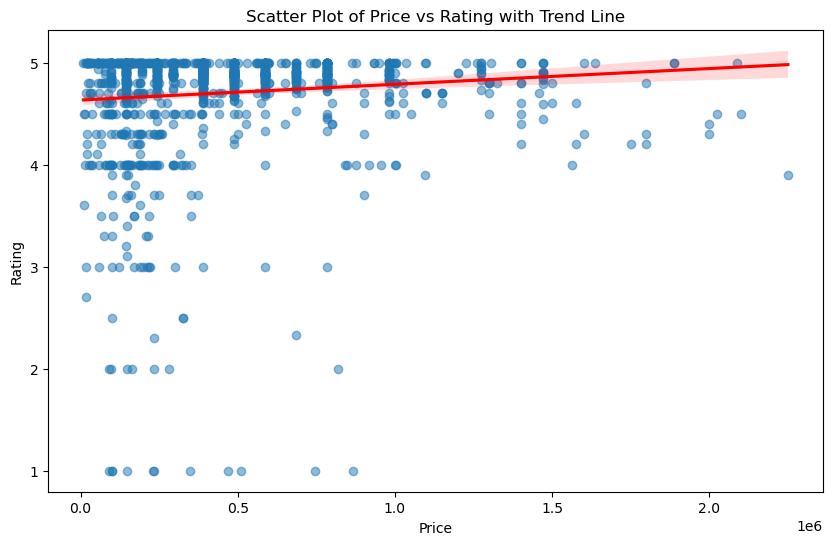

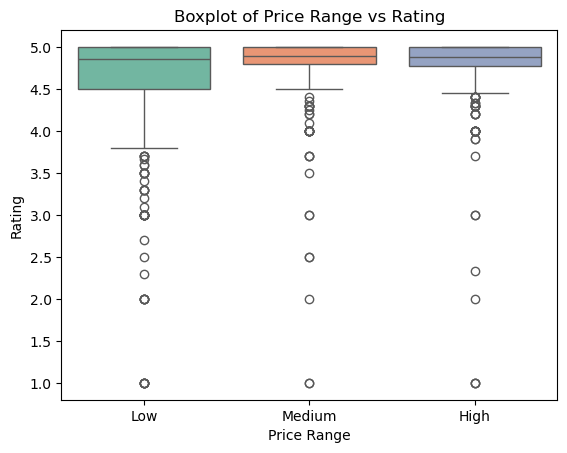

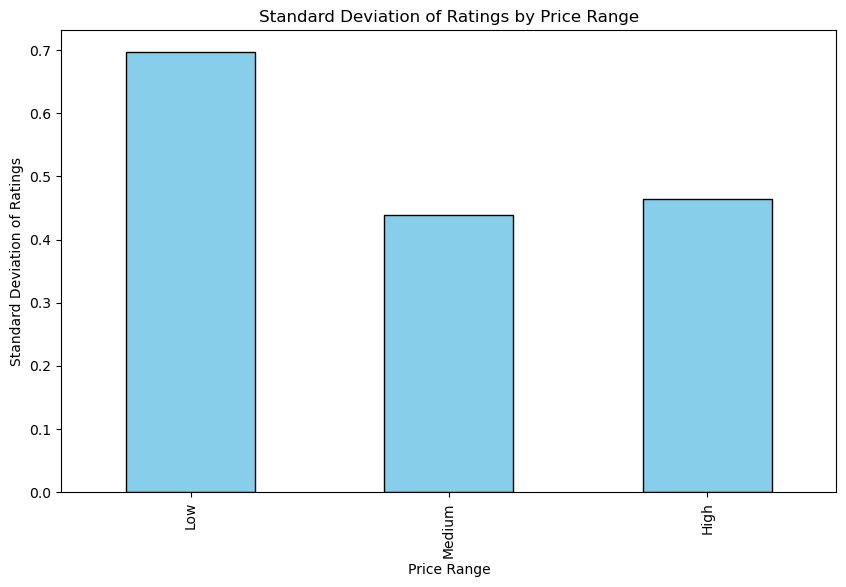

In [5]:
# Scatter Plot with Trend Line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Price', y='Rating', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Price vs Rating with Trend Line')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Boxplot: Price Range vs Rating
sns.boxplot(data=df, x='Price Range', y='Rating', hue = 'Price Range',palette='Set2', legend=False)
plt.title('Boxplot of Price Range vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

# Standard Deviation Analysis (Plot Std Dev of Ratings vs Price Range)
std_dev_ratings = df.groupby('Price Range', observed=False)['Rating'].std()
plt.figure(figsize=(10, 6))
std_dev_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Standard Deviation of Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Standard Deviation of Ratings')
plt.show()



## Conclusion Based on the Visualizations

### **Boxplot of Ratings by Price Range**
- **Median Consistency:** The median rating is consistent across the three price ranges (Low, Medium, High), showing that the central tendency of customer ratings remains stable regardless of price range.
- **Variability in Ratings:** The height of the boxes and whiskers indicates some variability in ratings within each price range. Products in the low-price range exhibit slightly more dispersed ratings compared to medium and high-price products.
- **Outliers:** Outliers are evident in all price ranges. These outliers represent products that receive either exceptionally high or low ratings, irrespective of their price.

### **Scatter Plot of Price vs. Rating with Trend Line**
- **Weak Positive Correlation:** The trend line suggests a slight positive relationship between price and rating, indicating that higher-priced products, on average, tend to have slightly higher ratings. However, the correlation is weak, as evidenced by the wide scatter of points around the trend line.
- **High Variability:** There is significant variability in ratings across all price points. High-priced products occasionally receive low ratings, and low-priced products sometimes receive high ratings.
- **Outliers:** Several outliers are present, showing products with unusual price-rating combinations. These represent exceptions to the general trend.

### **Standard Deviation of Ratings by Price Range**
1. **High Variability in Low Price Range:** 
   - The low-price range has the highest standard deviation, reflecting greater variation in customer ratings. Some low-priced products are highly rated, while others are poorly rated.
2. **Stable Ratings in Medium Price Range:** 
   - The medium-price range shows the lowest standard deviation, indicating that customer ratings are more consistent for products in this range.
3. **Variability in High Price Range:**
   - The high-price range exhibits a similar level of variability as the low-price range. This suggests that customer expectations and perceptions may fluctuate significantly for expensive products, resulting in diverse ratings.

---

### **Final Answer**
The visualizations collectively suggest that consumers do not systematically rate products more highly based solely on lower prices or larger purchase volumes. Instead:
- **Higher-priced products tend to have slightly higher ratings on average,** as shown by the weak positive correlation in the scatter plot and the boxplot’s central tendency.
- The high variability in ratings for low-priced products indicates a mix of exceptional value and poor quality within this category, leading to diverse customer experiences.
- Ultimately, **factors beyond price, such as product quality, brand reputation, and customer service, appear to play a more significant role in shaping consumer ratings** than price or purchase volume alone.